In [4]:
import sys
import os
import warnings
warnings.filterwarnings('ignore')

work_path = os.path.abspath(os.path.join(os.getcwd(), "../.."))
sys.path.append(work_path)

from my_helper.regression import *
from my_helper.util import *
from my_helper.plot import *
from my_helper.analysis import *
from my_helper.classification import *
from yjk_module.preprocessing import *
from yjk_module.ml_module import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV
from sklearn.linear_model import LogisticRegression
from statsmodels.api import MNLogit, add_constant
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_curve, precision_recall_curve

In [5]:
origin = pd.read_excel("./data/wine.xlsx")

In [8]:
df = origin.copy()
df['class'] = df['class'].astype('category')

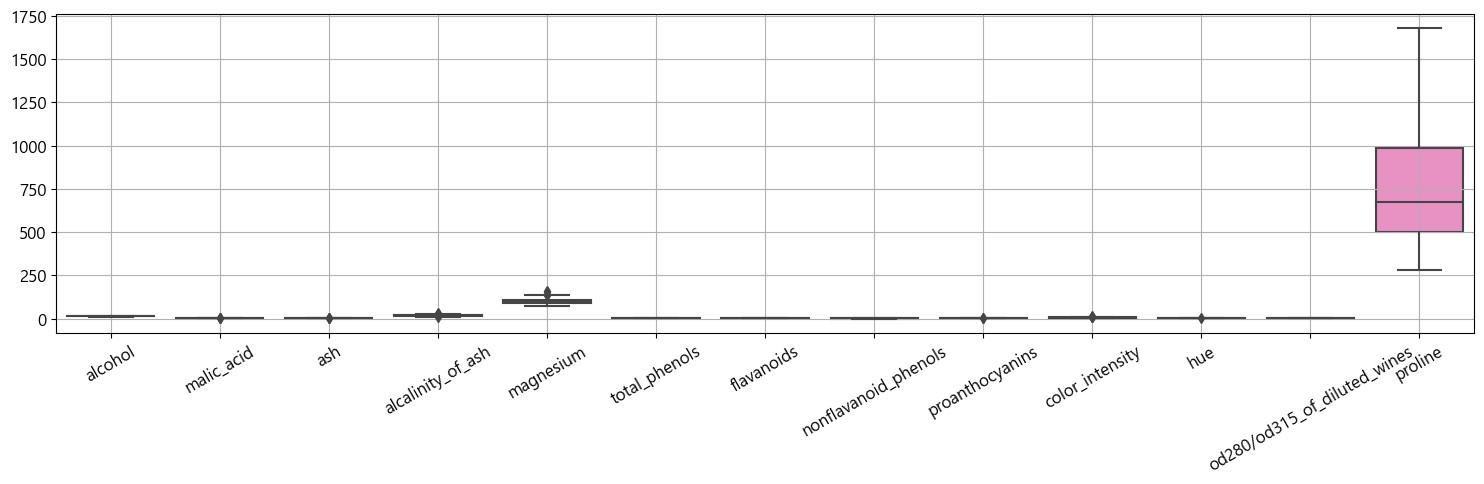

In [10]:
my_boxplot(df, figsize=(15, 5), callback=lambda ax: ax.set_xticklabels(ax.get_xticklabels(), rotation=30))

In [ ]:
my_distribution_by_class(df, hue='class', fill=True)

In [ ]:
my_scatter_by_class(df, hue='class', outline=True)

In [12]:
pp = YjkPreprocessor()
pp.set_strategy(outline = None, null = None)

아래와 같이 처리합니다.
+-------------+----------------+
| 범주        | 처리방법       |
|-------------+----------------|
| 이상치 처리 | 처리하지 않음  |
| 결측치 처리 | 처리하지 않음  |
| 스케일러    | StandardScaler |
| 인코딩      | 원핫인코딩     |
+-------------+----------------+


In [13]:
df_p = pp.fit_transform(df, yname = 'class', ylabeling = True)

데이터프레임 크기 : (178, 14)
데이터프레임에 결측치는 없습니다.
연속형 데이터 컬럼 : ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline'], 총 13개
종속변수 컬럼명 : class / 종속변수 라벨링 여부 : True


In [14]:
x_train, x_test, y_train, y_test = my_train_test_split(df_p, yname='class')
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((142, 13), (36, 13), (142,), (36,))

[교차검증]
+----+-------+-----------+-------------------+
|    |     C | penalty   |   mean_test_score |
|----+-------+-----------+-------------------|
| 10 |     1 | l2        |          0.992857 |
|  7 |   0.1 | l2        |          0.985714 |
|  4 |  0.01 | l2        |          0.979064 |
| 13 |    10 | l2        |          0.978571 |
| 16 |   100 | l2        |          0.971429 |
|  1 | 0.001 | l2        |          0.704433 |
+----+-------+-----------+-------------------+

[분류분석 성능평가]
+-------------------+--------------+--------------+-----------------------------------------------------------+
|                   |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------+--------------+--------------+-----------------------------------------------------------|
| 정확도(Accuracy)  |            1 |     0.972222 | 예측 결과(TN,FP,TP,TN)가 실제 결과(TP,TN)와 일치하는 정도 |
| 정밀도(Precision) |            1 |     0.972222 | 양성으로 예측한 결과(TP,FP) 중 실제 양성(TP)인 비율       |
|

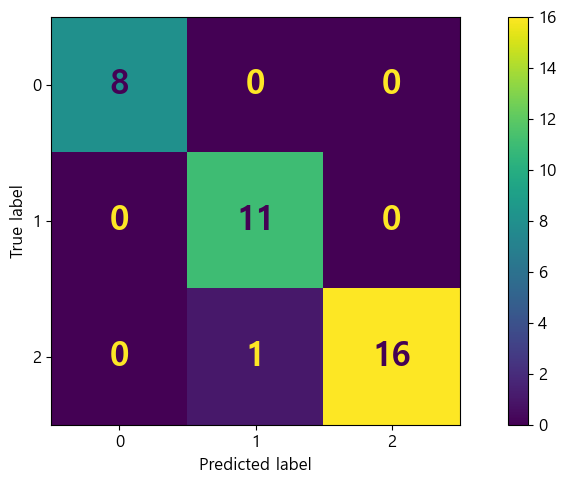


[학습곡선]


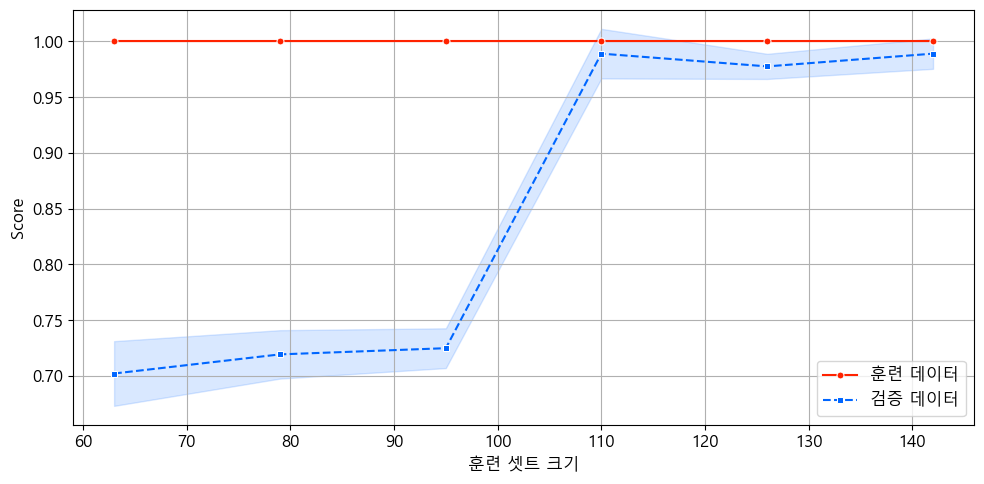

LogisticRegression(C=1, max_iter=500, n_jobs=-1)

In [17]:
my_logistic_classification(x_train, y_train, x_test, y_test, report=False)

In [ ]:
ros_x, ros_y = my_balance(x_train, y_train, method="over")
my_logistic_classification(ros_x, ros_y, x_test, y_test, report=False)

In [ ]:
rus_x, rus_y = my_balance(x_train, y_train, method='under')
my_logistic_classification(rus_x, rus_y, x_test, y_test, report=False)

In [ ]:
smote_x, smote_y = my_balance(x_train, y_train, method='smote')
estimator = my_logistic_classification(smote_x, smote_y, x_test, y_test, report=False)

In [ ]:
estimator.classes_

In [ ]:
estimator.coef_

In [ ]:
estimator.intercept_